<a href="https://colab.research.google.com/github/DataMiningKelompok3/Tugas1-Data-Mining/blob/main/Tugas_Data_Mining_Jual_Rumah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
pip install matplotlib

In [16]:
pip install pandas

In [17]:
pip install stats

In [18]:
pip install more-itertools

In [19]:
pip install seaborn

In [20]:
pip install numpy

In [21]:
pip install scikit-lego

In [22]:
pip install scikit-mlm

  Using cached https://files.pythonhosted.org/packages/03/df/4beec31e0d421ee4daffc7838ca262b4811340acca83b689f4020f180e1f/scikit-mlm-0.1.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/cc/34/64498f52ddfb0a22a22f2cfcc0b293c6864f6fcc664a53b4cce9302b59fc/fuzzy_c_means-1.2.4-py3-none-any.whl
ERROR: Could not find a version that satisfies the requirement mrsr>=0.0.3 (from scikit-mlm) (from versions: none)
ERROR: No matching distribution found for mrsr>=0.0.3 (from scikit-mlm)


In [23]:
pip install pytest-warnings

In [24]:
pip install scikit-learn

In [25]:
pip install scikit-mlm

  Using cached https://files.pythonhosted.org/packages/03/df/4beec31e0d421ee4daffc7838ca262b4811340acca83b689f4020f180e1f/scikit-mlm-0.1.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/cc/34/64498f52ddfb0a22a22f2cfcc0b293c6864f6fcc664a53b4cce9302b59fc/fuzzy_c_means-1.2.4-py3-none-any.whl
ERROR: Could not find a version that satisfies the requirement mrsr>=0.0.3 (from scikit-mlm) (from versions: none)
ERROR: No matching distribution found for mrsr>=0.0.3 (from scikit-mlm)


In [26]:
# Preprocessing Data
# Mengimport beberapa modul python
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [27]:
# Importing CSV data  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
try:
    # Running Locally 
    Rumah = pd.read_csv('main/Data Rumah.csv')
except:
    # Running in Google Colab
    !mkdir main
    !wget -P main/ https://raw.githubusercontent.com/DataMiningKelompok3/Tugas1-Data-Mining/main/Data%20Rumah.csv
    Rumah = pd.read_csv('main/Data Rumah.csv')

In [28]:
# Tipe Datanya : DataFrame (df)
print(type(Rumah))
# Ukuran Data
N, P = Rumah.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 100, ', Kolom = ', 17)

In [29]:
Rumah.head(5)

,No,Tgl_Iklan,Urt,Harga_Juta,Kota,LT_m,LB_m,KT,KM,KTP,KMP,Carport,Garasi,Listrik_Watt,Surat,Judul,Deskripsi
0,1,7-Apr-21,https://rumahdijual.com/2950575,1800,Tangerang,78,84,3,2,0,0,1,0,3500.0,SHM,RUMAH DIJUAL: The Arcadia Townhouse @ Bintaro,The Arcadia Town House Bintaro\nDevleoper Tris...
1,2,7-Apr-21,https://rumahdijual.com/2950576,3200,Tangerang,202,343,4,4,0,0,0,0,0.0,SHM,"RUMAH DIJUAL: Rumah villa melati mas,bangunan ...","Dijual rumah villa melati mas,bangunan bagus r..."
2,3,7-Apr-21,https://rumahdijual.com/2950577,1500,Tangerang,96,110,2,3,1,0,2,0,2200.0,SHM,RUMAH DIJUAL: Rumah Cantik Murah Villa Bintaro...,Rumah Murah Full Furnished VBR\nJalan Lebar\nD...
3,4,7-Apr-21,https://rumahdijual.com/2950578,3300,Tangerang,164,185,4,4,1,0,0,1,3300.0,SHM,RUMAH DIJUAL: Rumah Murah Jual Cepat Emerald B...,Rumah Emerald Murah Jual Cepat Bintaro Jaya Se...
4,5,7-Apr-21,https://rumahdijual.com/2950579,5800,Tangerang,775,450,4,4,1,0,0,1,3500.0,SHM,"RUMAH DIJUAL: Murah Hitung Tanah 7,5jt/m2 nego...",Murah. Jual Cepat. Jual Hitung Tanah aja. Jual...


Kesimpulan : data diatas memiliki 17 variabel

In [30]:
Rumah.tail(3)

,No,Tgl_Iklan,Urt,Harga_Juta,Kota,LT_m,LB_m,KT,KM,KTP,KMP,Carport,Garasi,Listrik_Watt,Surat,Judul,Deskripsi
97,98,16 maret 2021,https://www.rumah123.com/properti/tangerang/ho...,575,Tangerang,45,42,2,2,0,0,2,0,0.0,HGB,RUMAH 2 LANTAI DEKAT STASIUN CISAUK DAN AEON,Perumahan serpong Golden Park 2 terletak di da...
98,99,16 maret 2021,https://www.rumah123.com/properti/tangerang/ho...,1200,Tangerang,73,60,3,2,0,0,2,0,2200.0,SHM,RUMAH CANTIK DAN ELEGAN DI SERPONG,Perumahan serpong Golden Park 2 terletak di da...
99,100,11 Maret 2021,https://www.rumah123.com/properti/tangerang/ho...,700,Tangerang,55,100,3,2,1,1,0,0,1300.0,SHM,RUMAH MURAH Poris Indah 2 LANTAI lt. 55 m2 700...,"Jual rumah di Poris Indah siap huni lt. 55, lb..."


In [31]:
Rumah.sample(7)

,No,Tgl_Iklan,Urt,Harga_Juta,Kota,LT_m,LB_m,KT,KM,KTP,KMP,Carport,Garasi,Listrik_Watt,Surat,Judul,Deskripsi
74,75,1-Apr-21,https://www.rumah123.com/properti/tangerang/ho...,2100,Tangerang,105,150,3,3,1,0,1,0,2200.0,SHM,di rumah 2 lantai Cipondoh tangerang,Di Jual Rumah 2 Lantai\nSertifikat Hak Milik\n...
41,42,4-Apr-21,https://rumahdijual.com/bintaro/9473615-rumah-...,3350,Tangerang,200,200,6,3,1,0,1,0,3300.0,KPR,"RUMAH DIJUAL: Rumah Kuldesak Cilosari Bintaro,...","LT : 200 m2, LB : 200 m2, KT : 6+1, KM : 3, C..."
36,37,4-Apr-21,https://rumahdijual.com/tangerang/6072145-ruma...,1800,Tangerang,120,106,3,3,1,1,1,0,2200.0,"SHM, IMB","RUMAH DIJUAL: Rumah Cluster ""EP"" Pondok Aren, ...","Rumah cluster dg Taman Terbuka Hijau di ""EP"" P..."
40,41,4-Apr-21,https://rumahdijual.com/tangerang/5738237-ruma...,682,Tangerang,72,36,2,1,0,0,1,0,1300.0,SHM,RUMAH DIJUAL: Rumah Modern minimalis di PRPRPR...,"Hunian Premium Cluster terbaru "" Pin Residence..."
70,71,1-Apr-21,https://www.rumah123.com/properti/tangerang/ho...,1700,Tangerang,80,130,3,3,1,1,0,1,0.0,"PPJB,Girik,Adat,dll",Rumah Murah Dijamin Untung Cluster Karelia di ...,Dijual Rumah Murah Jual Rugi Dijamin Untung di...
2,3,7-Apr-21,https://rumahdijual.com/2950577,1500,Tangerang,96,110,2,3,1,0,2,0,2200.0,SHM,RUMAH DIJUAL: Rumah Cantik Murah Villa Bintaro...,Rumah Murah Full Furnished VBR\nJalan Lebar\nD...
18,19,6-Apr-21,https://rumahdijual.com/2950593,1100,Tangerang,78,54,2,1,0,0,0,1,NaN,NaN,RUMAH DIJUAL: DIJUAL RUMAH di The Green Reside...,Dijual rumah : Dijual rumah :\nLokasi di The G...


In [32]:
Rumah.columns

Index(['No', 'Tgl_Iklan', 'Urt', 'Harga_Juta', 'Kota', 'LT_m', 'LB_m', 'KT',
       'KM', 'KTP', 'KMP', 'Carport', 'Garasi', 'Listrik_Watt', 'Surat',
       'Judul', 'Deskripsi'],
      dtype='object')

In [ ]:
# Penghapusan pada kolom yang tidak digunakan dalam preprocessing data
Rumah.drop("no", axis=1, inplace=True)

In [34]:
# Memeriksa tipe data pada setiap variabel
# tipe data di setiap kolom
# Wajib di periksa apakah tipe datanya sudah tepat?
# Perhatikan df sebagaimana semua variable di Python diperlakukan seperti object
Rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No            100 non-null    int64  
 1   Tgl_Iklan     100 non-null    object 
 2   Urt           100 non-null    object 
 3   Harga_Juta    100 non-null    int64  
 4   Kota          100 non-null    object 
 5   LT_m          100 non-null    int64  
 6   LB_m          100 non-null    int64  
 7   KT            100 non-null    int64  
 8   KM            100 non-null    int64  
 9   KTP           100 non-null    int64  
 10  KMP           100 non-null    int64  
 11  Carport       100 non-null    int64  
 12  Garasi        100 non-null    int64  
 13  Listrik_Watt  99 non-null     float64
 14  Surat         98 non-null     object 
 15  Judul         100 non-null    object 
 16  Deskripsi     100 non-null    object 
dtypes: float64(1), int64(10), object(6)
memory usage: 13.4+ KB


In [35]:
Rumah.dtypes

No                int64
Tgl_Iklan        object
Urt              object
Harga_Juta        int64
Kota             object
LT_m              int64
LB_m              int64
KT                int64
KM                int64
KTP               int64
KMP               int64
Carport           int64
Garasi            int64
Listrik_Watt    float64
Surat            object
Judul            object
Deskripsi        object
dtype: object

In [36]:
# Mengecek adanya duplikasi data atau tidak
print(Rumah.shape)
Rumah.duplicated().sum()

(100, 17)


0

In [37]:
# Menghapus entri yang memiliki data duplikat
Rumah.drop_duplicates(inplace=True)
print(Rumah.duplicated().sum())
print(Rumah.shape)

0
(100, 17)


In [38]:
# Memilih hanya variable dengan tipe tertentu
Rumah_num = Rumah.select_dtypes(include=['float64', 'int64'])
Rumah_num.head()

,No,Harga_Juta,LT_m,LB_m,KT,KM,KTP,KMP,Carport,Garasi,Listrik_Watt
0,1,1800,78,84,3,2,0,0,1,0,3500.0
1,2,3200,202,343,4,4,0,0,0,0,0.0
2,3,1500,96,110,2,3,1,0,2,0,2200.0
3,4,3300,164,185,4,4,1,0,0,1,3300.0
4,5,5800,775,450,4,4,1,0,0,1,3500.0


In [39]:
# Memilih hanya variable dengan tipe tertentu
Rumah_obj = Rumah.select_dtypes(include = [object])
Rumah_obj.head()

,Tgl_Iklan,Urt,Kota,Surat,Judul,Deskripsi
0,7-Apr-21,https://rumahdijual.com/2950575,Tangerang,SHM,RUMAH DIJUAL: The Arcadia Townhouse @ Bintaro,The Arcadia Town House Bintaro\nDevleoper Tris...
1,7-Apr-21,https://rumahdijual.com/2950576,Tangerang,SHM,"RUMAH DIJUAL: Rumah villa melati mas,bangunan ...","Dijual rumah villa melati mas,bangunan bagus r..."
2,7-Apr-21,https://rumahdijual.com/2950577,Tangerang,SHM,RUMAH DIJUAL: Rumah Cantik Murah Villa Bintaro...,Rumah Murah Full Furnished VBR\nJalan Lebar\nD...
3,7-Apr-21,https://rumahdijual.com/2950578,Tangerang,SHM,RUMAH DIJUAL: Rumah Murah Jual Cepat Emerald B...,Rumah Emerald Murah Jual Cepat Bintaro Jaya Se...
4,7-Apr-21,https://rumahdijual.com/2950579,Tangerang,SHM,"RUMAH DIJUAL: Murah Hitung Tanah 7,5jt/m2 nego...",Murah. Jual Cepat. Jual Hitung Tanah aja. Jual...


In [40]:
# Memilih hanya variable dengan tipe tertentu
Rumah_cat = Rumah.select_dtypes(include = ['category'])
Rumah_cat.head()

""
0
1
2
3
4


In [41]:
df = pd.get_dummies(Rumah['Surat'], prefix='Sertif')
df.head()

,Sertif_HGB,Sertif_KPR,"Sertif_Lainnya (PPJB,Girik,Adat,dll)",Sertif_PPJB,"Sertif_PPJB, AJB","Sertif_PPJB,Girik,Adat,dll",Sertif_SHM,"Sertif_SHM, IMB"
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0


In [42]:
df2 = pd.concat([Rumah, df], axis = 1)
df2.head().transpose()

,0,1,2,3,4
No,1,2,3,4,5
Tgl_Iklan,7-Apr-21,7-Apr-21,7-Apr-21,7-Apr-21,7-Apr-21
Urt,https://rumahdijual.com/2950575,https://rumahdijual.com/2950576,https://rumahdijual.com/2950577,https://rumahdijual.com/2950578,https://rumahdijual.com/2950579
Harga_Juta,1800,3200,1500,3300,5800
Kota,Tangerang,Tangerang,Tangerang,Tangerang,Tangerang
LT_m,78,202,96,164,775
LB_m,84,343,110,185,450
KT,3,4,2,4,4
KM,2,4,3,4,4
KTP,0,0,1,1,1


In [43]:
# Memilih beberapa kolom secara manual
X = Rumah[['Harga_Juta','LT_m']]
X[:5]

,Harga_Juta,LT_m
0,1800,78
1,3200,202
2,1500,96
3,3300,164
4,5800,775


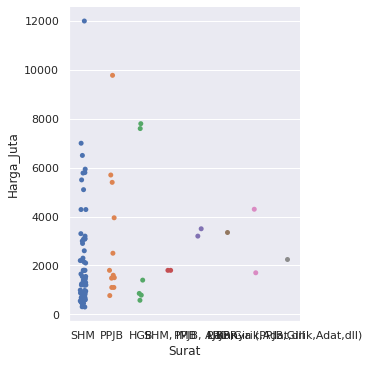

In [44]:
p= sns.catplot(x="Surat", y="Harga_Juta", data=Rumah)


Kesimpulan : Terdapat Outlier pada jenis sertifikat rumah SHM dan PPJB

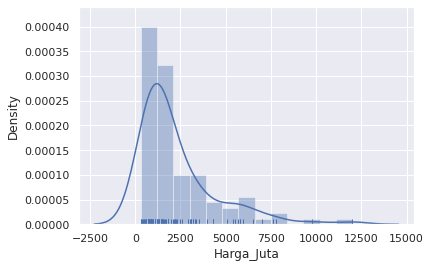

In [45]:
# Distribusi
p = sns.distplot(Rumah['Harga_Juta'], kde=True, rug=True)

In [46]:
# Misal dengan asumsi data berdistribusi normal
# dan menggunakan 95% confidence interval di sekitar variabel "harga"

df3 = np.abs(Rumah.Harga_Juta - Rumah.Harga_Juta.mean())<=(2*Rumah.Harga_Juta.std())
# mu-2s<x<mu+2s
print(df3.shape)
df3.head()

(100,)


0    True
1    True
2    True
3    True
4    True
Name: Harga_Juta, dtype: bool

In [ ]:
# Distribusi
p = sns.distplot(Rumah['LT_m'], kde=True, rug=True)

In [47]:
# Misal dengan asumsi data berdistribusi normal
# dan menggunakan 95% confidence interval di sekitar variabel "Luas_Tanah"

df4 = np.abs(Rumah.LB_m - Rumah.LB_m.mean())<=(2*Rumah.LB_m.std())
# mu-2s<x<mu+2s
print(df4.shape)
df4.head()

(100,)


0     True
1    False
2     True
3     True
4    False
Name: LB_m, dtype: bool

In [49]:
Rumah3 = Rumah[df3] # Data tanpa outliers  #untuk variabel 'Harga_Juta'
print(Rumah3.shape, Rumah.shape)
# Perhatikan disini sengaja data yang telah di remove outliernya 
# disimpan dalam variabel baru "rumah3"
# Jika datanya besar hati-hati melakukan hal ini

(95, 17) (100, 17)


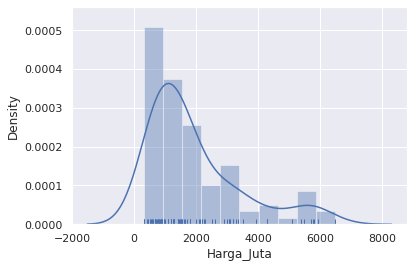

In [50]:
# Distribusi
p = sns.distplot(Rumah3['Harga_Juta'], kde=True, rug=True)

In [51]:
Rumah2 = Rumah[df4] # Data tanpa outliers #Variabel Luas_Tanah
print(Rumah2.shape, Rumah.shape)
# Perhatikan disini sengaja data yang telah di remove outliernya 
# disimpan dalam variabel baru "rumah2"
# Jika datanya besar hati-hati melakukan hal ini

(95, 17) (100, 17)


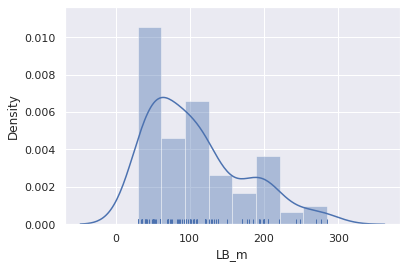

In [52]:
# Distribusi
p = sns.distplot(Rumah2['LB_m'], kde=True, rug=True)

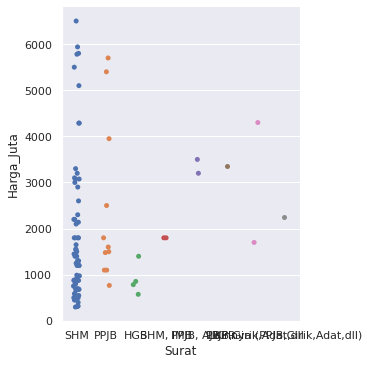

In [53]:
p= sns.catplot(x="Surat", y="Harga_Juta", data=Rumah3)

Kesimpulan : Outlier telah dihilangkan namun outlier dapat diolah secara terpisah untuk memperoleh informasi baru.

In [54]:
# Melihat adanya missing value
print(Rumah2.isnull().sum())

No              0
Tgl_Iklan       0
Urt             0
Harga_Juta      0
Kota            0
LT_m            0
LB_m            0
KT              0
KM              0
KTP             0
KMP             0
Carport         0
Garasi          0
Listrik_Watt    1
Surat           2
Judul           0
Deskripsi       0
dtype: int64


In [55]:
set(Rumah3['Surat'])

{'HGB',
 'KPR',
 'Lainnya (PPJB,Girik,Adat,dll)',
 'PPJB',
 'PPJB, AJB',
 'PPJB,Girik,Adat,dll',
 'SHM',
 'SHM, IMB',
 nan}

In [56]:
# Melihat adanya missing value
print(Rumah3.isnull().sum())

No              0
Tgl_Iklan       0
Urt             0
Harga_Juta      0
Kota            0
LT_m            0
LB_m            0
KT              0
KM              0
KTP             0
KMP             0
Carport         0
Garasi          0
Listrik_Watt    1
Surat           2
Judul           0
Deskripsi       0
dtype: int64


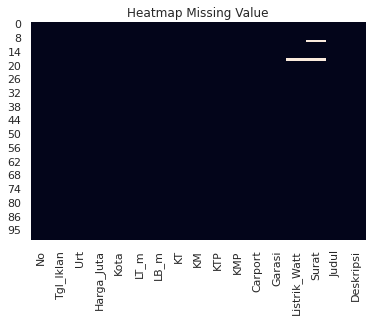

In [57]:
sns.heatmap(Rumah2.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

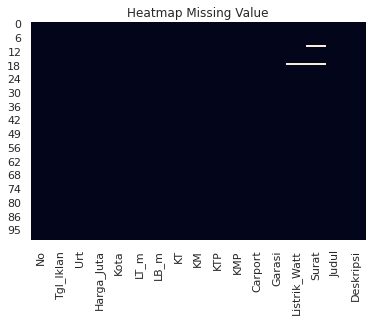

In [58]:
sns.heatmap(Rumah3.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [59]:
(Rumah3.isnull().sum()/len(Rumah3)).to_frame('persentase missing')

,persentase missing
No,0.000000
Tgl_Iklan,0.000000
Urt,0.000000
Harga_Juta,0.000000
Kota,0.000000
LT_m,0.000000
LB_m,0.000000
KT,0.000000
KM,0.000000
KTP,0.000000


Kesimpulan : Berdasarkan output diatas sudah tidak ada yang memiliki Missing value yang persentasenya diatas 50%.

In [ ]:
# Drop kolom Listrik karena terdapat banyak missing value
Rumah3.drop("Listrik", axis=1, inplace=True)

In [ ]:
# Drop kolom Listrik karena terdapat banyak missing value
Rumah2.drop("Listrik", axis=1, inplace=True)

In [60]:
Rumah3.head()

,No,Tgl_Iklan,Urt,Harga_Juta,Kota,LT_m,LB_m,KT,KM,KTP,KMP,Carport,Garasi,Listrik_Watt,Surat,Judul,Deskripsi
0,1,7-Apr-21,https://rumahdijual.com/2950575,1800,Tangerang,78,84,3,2,0,0,1,0,3500.0,SHM,RUMAH DIJUAL: The Arcadia Townhouse @ Bintaro,The Arcadia Town House Bintaro\nDevleoper Tris...
1,2,7-Apr-21,https://rumahdijual.com/2950576,3200,Tangerang,202,343,4,4,0,0,0,0,0.0,SHM,"RUMAH DIJUAL: Rumah villa melati mas,bangunan ...","Dijual rumah villa melati mas,bangunan bagus r..."
2,3,7-Apr-21,https://rumahdijual.com/2950577,1500,Tangerang,96,110,2,3,1,0,2,0,2200.0,SHM,RUMAH DIJUAL: Rumah Cantik Murah Villa Bintaro...,Rumah Murah Full Furnished VBR\nJalan Lebar\nD...
3,4,7-Apr-21,https://rumahdijual.com/2950578,3300,Tangerang,164,185,4,4,1,0,0,1,3300.0,SHM,RUMAH DIJUAL: Rumah Murah Jual Cepat Emerald B...,Rumah Emerald Murah Jual Cepat Bintaro Jaya Se...
4,5,7-Apr-21,https://rumahdijual.com/2950579,5800,Tangerang,775,450,4,4,1,0,0,1,3500.0,SHM,"RUMAH DIJUAL: Murah Hitung Tanah 7,5jt/m2 nego...",Murah. Jual Cepat. Jual Hitung Tanah aja. Jual...


In [61]:
# Ukuran Data
N, P = Rumah3.shape
'baris = ', N, ', Kolom = ', P

('baris = ', 95, ', Kolom = ', 17)

In [64]:
print(Rumah3.isnull().sum())

No              0
Tgl_Iklan       0
Urt             0
Harga_Juta      0
Kota            0
LT_m            0
LB_m            0
KT              0
KM              0
KTP             0
KMP             0
Carport         0
Garasi          0
Listrik_Watt    1
Surat           2
Judul           0
Deskripsi       0
dtype: int64


In [65]:
X = Rumah3.dropna()

In [66]:
print(X.isnull().sum())

No              0
Tgl_Iklan       0
Urt             0
Harga_Juta      0
Kota            0
LT_m            0
LB_m            0
KT              0
KM              0
KTP             0
KMP             0
Carport         0
Garasi          0
Listrik_Watt    0
Surat           0
Judul           0
Deskripsi       0
dtype: int64


Kesimpulan : Berdasarkan output diatas sudah tidak ada yang memiliki Missing value.

In [67]:
set(X['Surat'])

{'HGB',
 'KPR',
 'Lainnya (PPJB,Girik,Adat,dll)',
 'PPJB',
 'PPJB, AJB',
 'PPJB,Girik,Adat,dll',
 'SHM',
 'SHM, IMB'}

In [70]:
X.head()

,No,Tgl_Iklan,Urt,Harga_Juta,Kota,LT_m,LB_m,KT,KM,KTP,KMP,Carport,Garasi,Listrik_Watt,Surat,Judul,Deskripsi
0,1,7-Apr-21,https://rumahdijual.com/2950575,1800,Tangerang,78,84,3,2,0,0,1,0,3500.0,SHM,RUMAH DIJUAL: The Arcadia Townhouse @ Bintaro,The Arcadia Town House Bintaro\nDevleoper Tris...
1,2,7-Apr-21,https://rumahdijual.com/2950576,3200,Tangerang,202,343,4,4,0,0,0,0,0.0,SHM,"RUMAH DIJUAL: Rumah villa melati mas,bangunan ...","Dijual rumah villa melati mas,bangunan bagus r..."
2,3,7-Apr-21,https://rumahdijual.com/2950577,1500,Tangerang,96,110,2,3,1,0,2,0,2200.0,SHM,RUMAH DIJUAL: Rumah Cantik Murah Villa Bintaro...,Rumah Murah Full Furnished VBR\nJalan Lebar\nD...
3,4,7-Apr-21,https://rumahdijual.com/2950578,3300,Tangerang,164,185,4,4,1,0,0,1,3300.0,SHM,RUMAH DIJUAL: Rumah Murah Jual Cepat Emerald B...,Rumah Emerald Murah Jual Cepat Bintaro Jaya Se...
4,5,7-Apr-21,https://rumahdijual.com/2950579,5800,Tangerang,775,450,4,4,1,0,0,1,3500.0,SHM,"RUMAH DIJUAL: Murah Hitung Tanah 7,5jt/m2 nego...",Murah. Jual Cepat. Jual Hitung Tanah aja. Jual...


In [69]:
# Ukuran Data
N, P = X.shape
'baris = ', N, ', Kolom = ', P

('baris = ', 93, ', Kolom = ', 17)

In [71]:
# Melihat Statistika Sederhana dari data "Numerik"-nya
X.describe(include='all')

,No,Tgl_Iklan,Urt,Harga_Juta,Kota,LT_m,LB_m,KT,KM,KTP,KMP,Carport,Garasi,Listrik_Watt,Surat,Judul,Deskripsi
count,93.000000,93,93,93.000000,93,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93,93,93
unique,NaN,16,90,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,87,89
top,NaN,4-Apr-21,https://rumahdijual.com/2950575,NaN,Tangerang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHM,"RUMAH DIJUAL: Rumah Cluster ""EP"" Pondok Aren, ...",LOKASI BAGUS
freq,NaN,23,3,NaN,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,3,2
mean,49.881720,NaN,NaN,1933.935484,NaN,116.032258,111.258065,3.096774,2.408602,0.473118,0.311828,0.612903,0.408602,2233.333333,NaN,NaN,NaN
std,28.586957,NaN,NaN,1519.944813,NaN,99.504146,73.558599,0.978736,0.969497,0.543567,0.465751,0.552312,0.515764,1336.391421,NaN,NaN,NaN
min,1.000000,NaN,NaN,300.000000,NaN,30.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,26.000000,NaN,NaN,875.000000,NaN,60.000000,53.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,NaN,NaN,NaN
50%,50.000000,NaN,NaN,1400.000000,NaN,92.000000,98.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2200.000000,NaN,NaN,NaN
75%,74.000000,NaN,NaN,2500.000000,NaN,128.000000,138.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3300.000000,NaN,NaN,NaN


In [72]:
# Statistik sederhana seluruh datanya
X[['Harga_Juta','LT_m']].describe(include='all')

,Harga_Juta,LT_m
count,93.000000,93.000000
mean,1933.935484,116.032258
std,1519.944813,99.504146
min,300.000000,30.000000
25%,875.000000,60.000000
50%,1400.000000,92.000000
75%,2500.000000,128.000000
max,6501.000000,775.000000


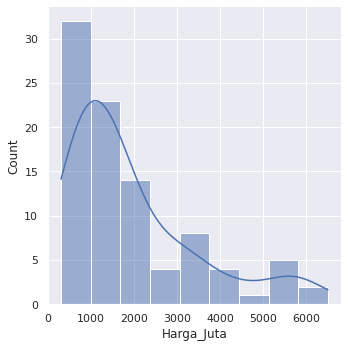

In [73]:
col = "Harga_Juta"
plot = sns.displot(data=X, x=col, kde=True)

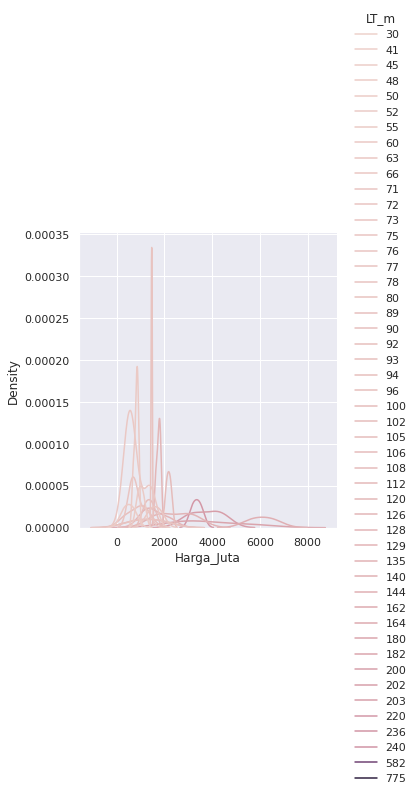

In [74]:
plot = sns.displot(data=X, x=col, hue='LT_m', kind="kde")

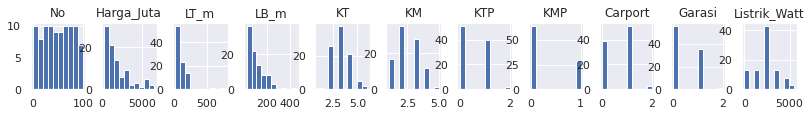

In [75]:
numerical = X.select_dtypes(include = ['int64','float64']).columns

X[numerical].hist(figsize=(15, 6), layout=(4, 12));

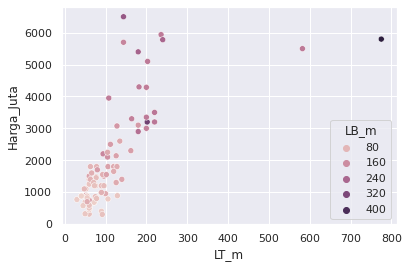

In [76]:
p = sns.scatterplot(x=X['LT_m'], y=X['Harga_Juta'], hue=X['LB_m'])

Kesimpulan : Berdasarkan hasil diatas adanya hubungan positif antara variabel LT_m dengan Harga_Juta.

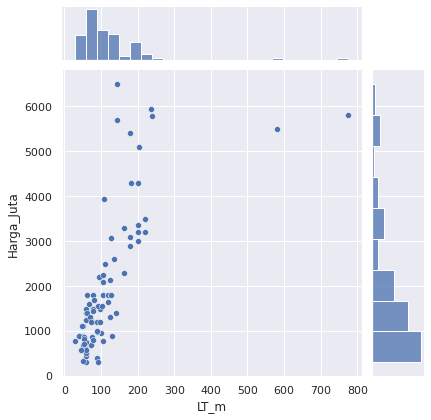

In [77]:
p = sns.jointplot(x=X['LT_m'], y=X['Harga_Juta'])

In [78]:
X.corr()

,No,Harga_Juta,LT_m,LB_m,KT,KM,KTP,KMP,Carport,Garasi,Listrik_Watt
No,1.000000,-0.065558,-0.082182,-0.164971,-0.113025,-0.186881,-0.046024,0.197914,0.136131,-0.142655,-0.027750
Harga_Juta,-0.065558,1.000000,0.703642,0.854507,0.672209,0.781189,0.510091,0.449296,0.167568,0.210054,0.522679
LT_m,-0.082182,0.703642,1.000000,0.768585,0.436365,0.529543,0.291313,0.179908,-0.008670,0.229540,0.338348
LB_m,-0.164971,0.854507,0.768585,1.000000,0.580612,0.740012,0.518045,0.395796,0.108433,0.226965,0.396611
KT,-0.113025,0.672209,0.436365,0.580612,1.000000,0.794099,0.342057,0.314597,0.230914,0.050011,0.314127
KM,-0.186881,0.781189,0.529543,0.740012,0.794099,1.000000,0.495465,0.388776,0.217399,0.205924,0.380320
KTP,-0.046024,0.510091,0.291313,0.518045,0.342057,0.495465,1.000000,0.741888,0.254606,0.272232,0.239910
KMP,0.197914,0.449296,0.179908,0.395796,0.314597,0.388776,0.741888,1.000000,0.305323,0.142558,0.224112
Carport,0.136131,0.167568,-0.008670,0.108433,0.230914,0.217399,0.254606,0.305323,1.000000,-0.316336,0.179661
Garasi,-0.142655,0.210054,0.229540,0.226965,0.050011,0.205924,0.272232,0.142558,-0.316336,1.000000,0.028911


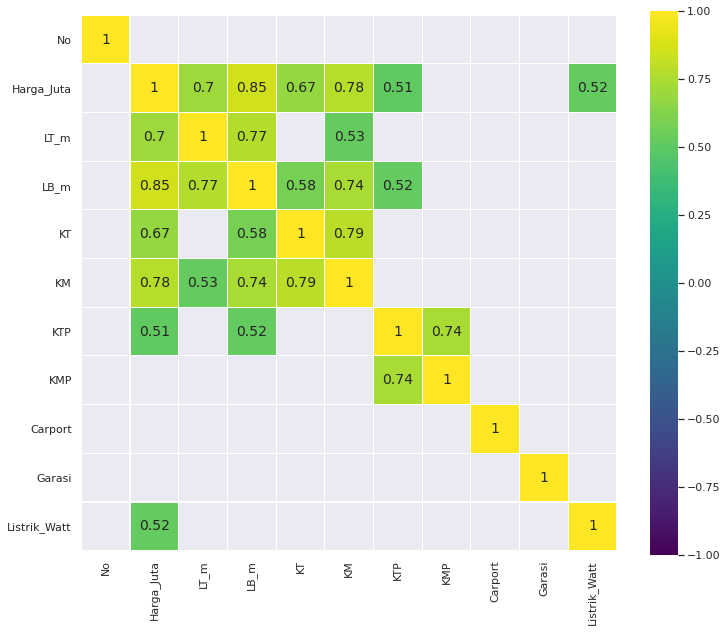

In [79]:
# HeatMap untuk menyelidiki korelasi
corr2 = X.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

Kesimpulan : Dari 100 data iklan jual rumah di Tangerang Berdasarkan output diatas sudah tidak ada yang memiliki Missing value yang persentasenya diatas 50%. dan data diatas terdapat hubungan positif antara variabel LT_m dengan Harga_Juta.

In [80]:
# Run this cell ONLY if this notebook run from Google Colab
# Kalau dijalankan lokal (Anaconda/WinPython) maka silahkan install di terminal/command prompt 
# Lalu unduh secara manual file yang dibutuhkan dan letakkan di folder Python anda.
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

Requirement already up-to-date: umap-learn in /usr/local/lib/python3.7/dist-packages (0.5.1)
--2021-04-20 04:12:07--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py.2’

tau_unsup.py.2      100%[===================>]  16.98K  --.-KB/s    in 0.001s  

2021-04-20 04:12:07 (28.6 MB/s) - ‘tau_unsup.py.2’ saved [17387/17387]



In [81]:
# Importing Modules untuk Notebook ini
import umap, tau_unsup as tau, seaborn as sns, pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

sns.set(style="ticks", color_codes=True)

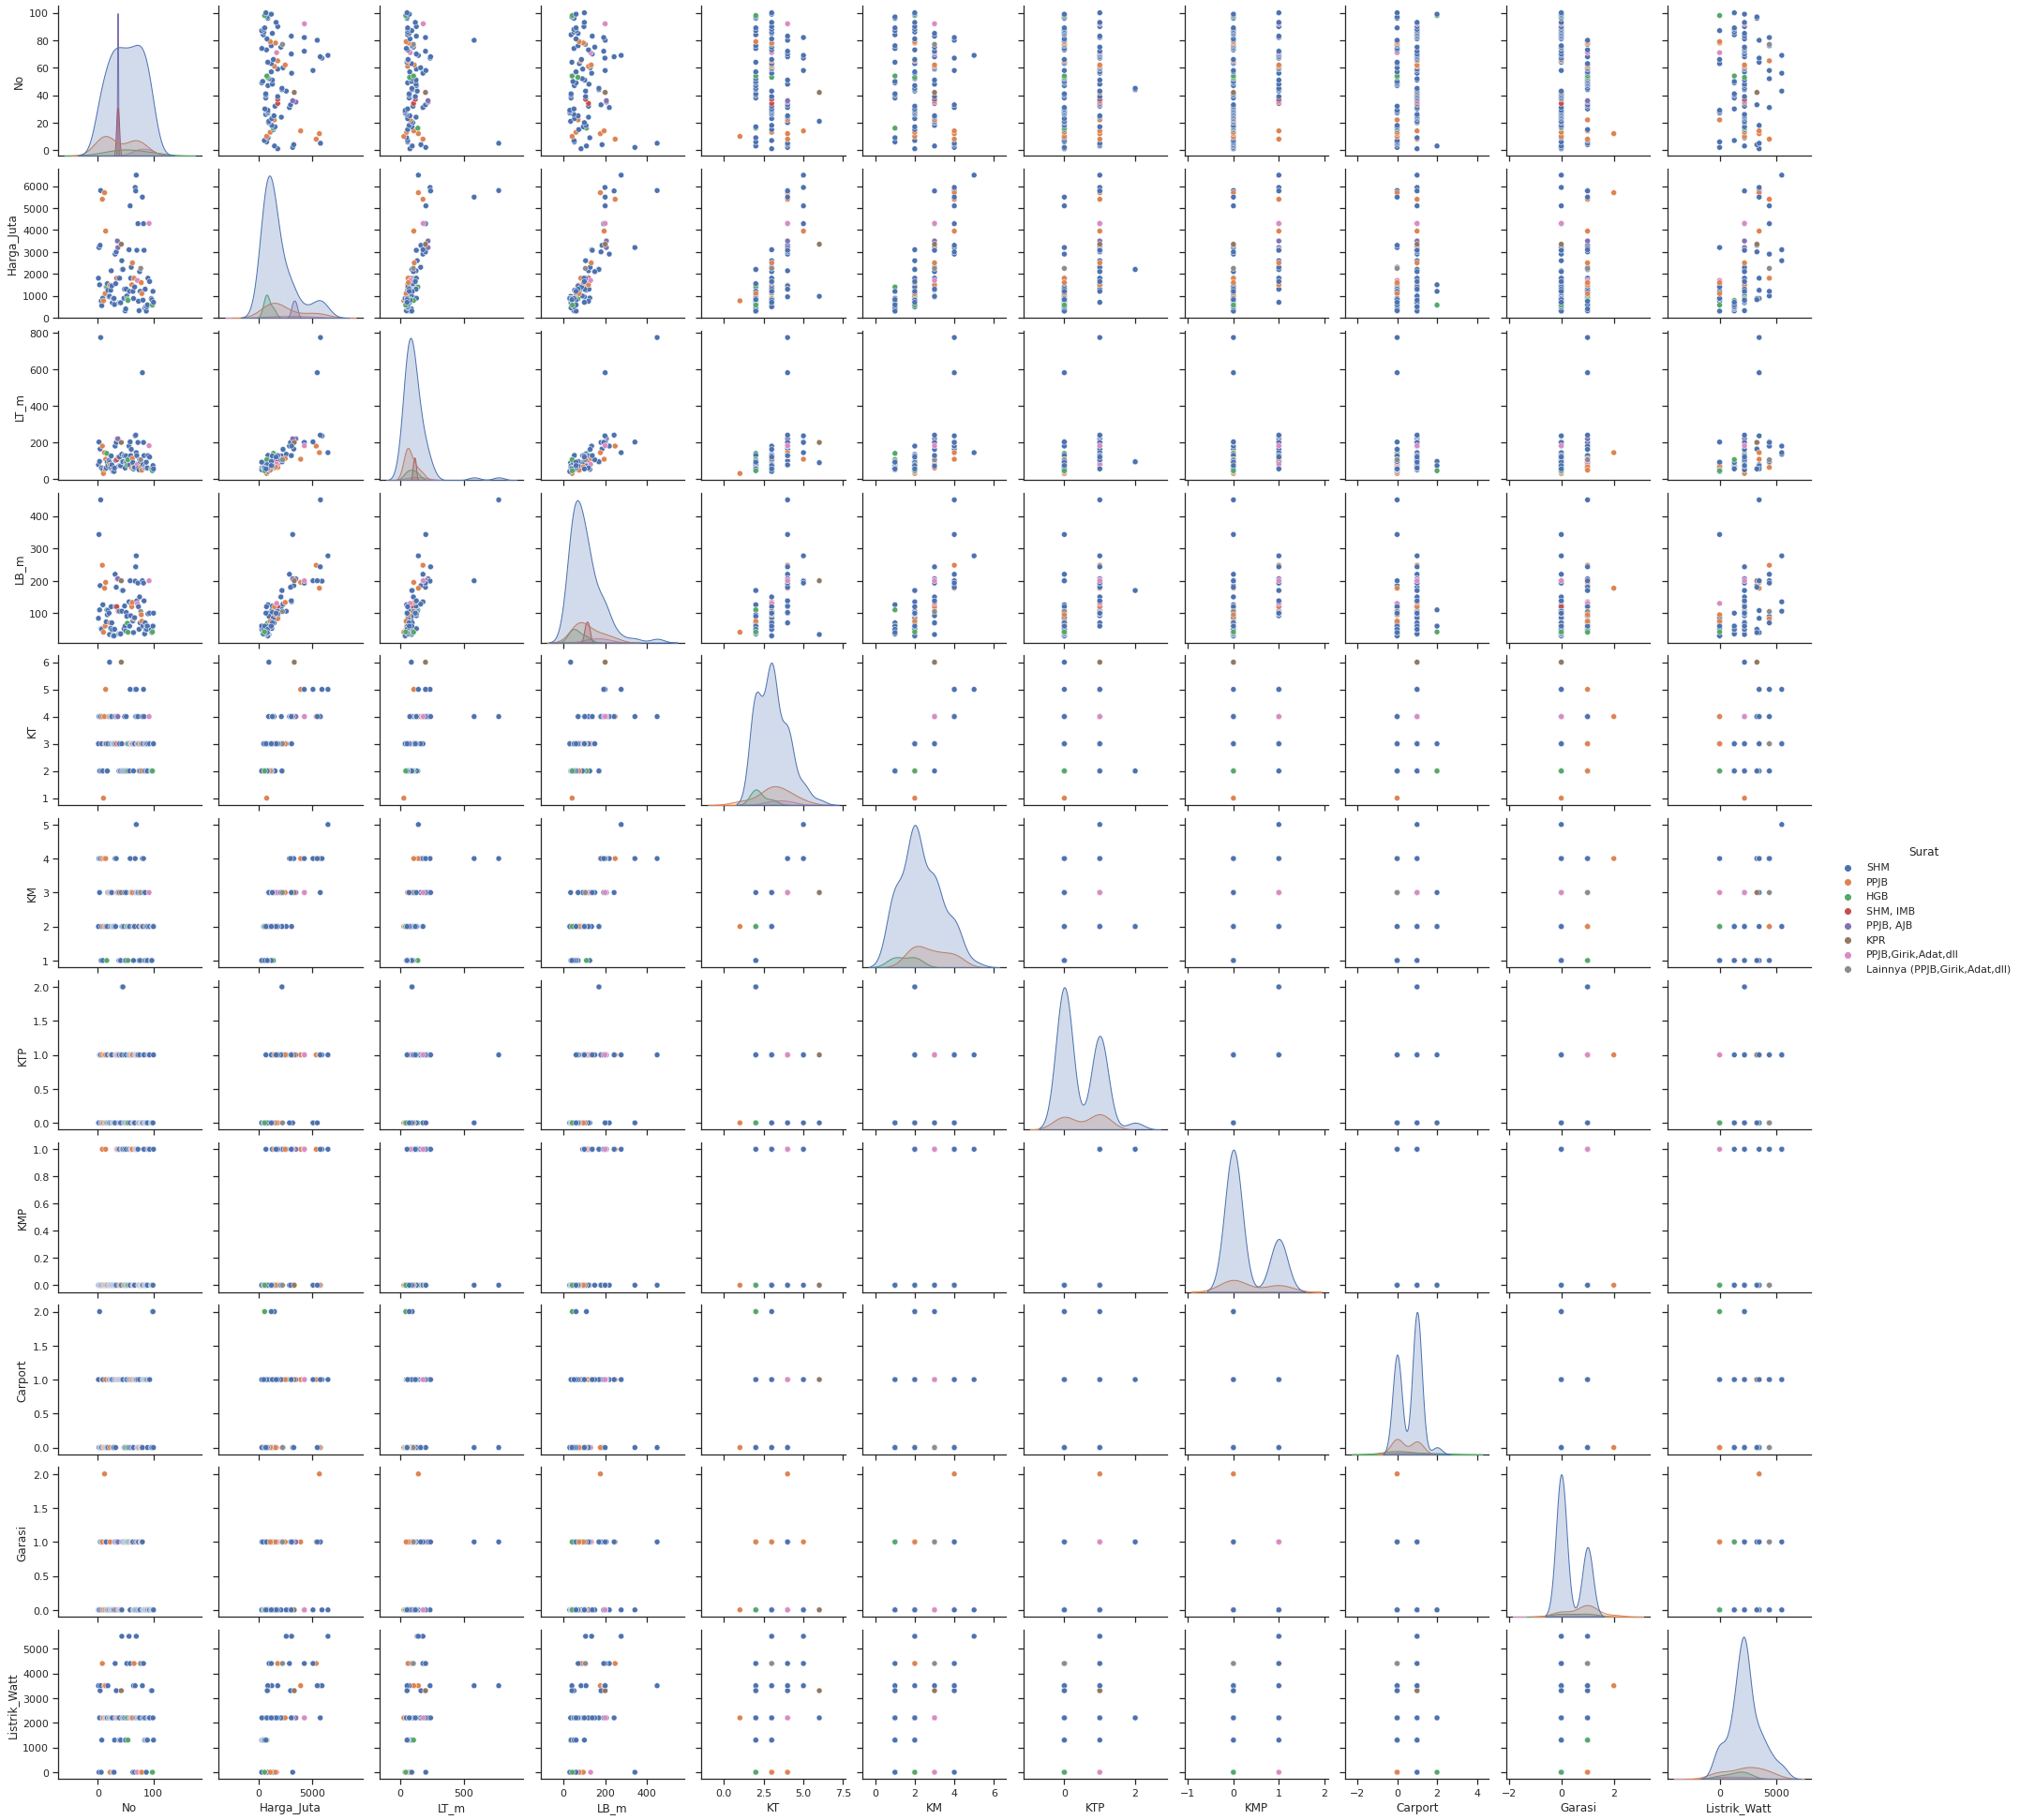

In [82]:
g = sns.pairplot(X, hue="Surat")

In [83]:
Rumah_num2 = Rumah2.select_dtypes(include = ['float64', 'int64'])
Rumah_num2.head()

,No,Harga_Juta,LT_m,LB_m,KT,KM,KTP,KMP,Carport,Garasi,Listrik_Watt
0,1,1800,78,84,3,2,0,0,1,0,3500.0
2,3,1500,96,110,2,3,1,0,2,0,2200.0
3,4,3300,164,185,4,4,1,0,0,1,3300.0
5,6,760,60,52,2,1,0,0,0,0,0.0
6,7,550,60,50,3,2,0,0,0,1,1300.0


In [84]:
X = pd.DataFrame(Rumah_num2)
X.head()

,No,Harga_Juta,LT_m,LB_m,KT,KM,KTP,KMP,Carport,Garasi,Listrik_Watt
0,1,1800,78,84,3,2,0,0,1,0,3500.0
2,3,1500,96,110,2,3,1,0,2,0,2200.0
3,4,3300,164,185,4,4,1,0,0,1,3300.0
5,6,760,60,52,2,1,0,0,0,0,0.0
6,7,550,60,50,3,2,0,0,0,1,1300.0


In [85]:
from sklearn import preprocessing

In [86]:
minmax = preprocessing.MinMaxScaler().fit_transform(X.drop('Harga_Juta', axis=1))

In [87]:
df5 = pd.DataFrame(minmax, index=X.index, columns=X.columns[:-1])

In [88]:
df5

,No,Harga_Juta,LT_m,LB_m,KT,KM,KTP,KMP,Carport,Garasi
0,0.000000,0.086957,0.211765,0.4,0.25,0.0,0.0,0.5,0.0,0.636364
2,0.020202,0.119565,0.313725,0.2,0.50,0.5,0.0,1.0,0.0,0.400000
3,0.030303,0.242754,0.607843,0.6,0.75,0.5,0.0,0.0,0.5,0.600000
5,0.050505,0.054348,0.086275,0.2,0.00,0.0,0.0,0.0,0.0,0.000000
6,0.060606,0.054348,0.078431,0.4,0.25,0.0,0.0,0.0,0.5,0.236364
...,...,...,...,...,...,...,...,...,...,...
95,0.959596,0.045290,0.078431,0.2,0.00,0.0,0.0,0.0,0.0,0.600000
96,0.969697,0.045290,0.039216,0.2,0.00,0.0,0.0,0.0,0.0,0.600000
97,0.979798,0.027174,0.047059,0.2,0.25,0.0,0.0,1.0,0.0,0.000000
98,0.989899,0.077899,0.117647,0.4,0.25,0.0,0.0,1.0,0.0,0.400000


In [89]:
df5.head()

,No,Harga_Juta,LT_m,LB_m,KT,KM,KTP,KMP,Carport,Garasi
0,0.000000,0.086957,0.211765,0.4,0.25,0.0,0.0,0.5,0.0,0.636364
2,0.020202,0.119565,0.313725,0.2,0.50,0.5,0.0,1.0,0.0,0.400000
3,0.030303,0.242754,0.607843,0.6,0.75,0.5,0.0,0.0,0.5,0.600000
5,0.050505,0.054348,0.086275,0.2,0.00,0.0,0.0,0.0,0.0,0.000000
6,0.060606,0.054348,0.078431,0.4,0.25,0.0,0.0,0.0,0.5,0.236364


In [90]:
c_data = np.array(df5)
c_data[:5]

array([[0.        , 0.08695652, 0.21176471, 0.4       , 0.25      ,
        0.        , 0.        , 0.5       , 0.        , 0.63636364],
       [0.02020202, 0.11956522, 0.31372549, 0.2       , 0.5       ,
        0.5       , 0.        , 1.        , 0.        , 0.4       ],
       [0.03030303, 0.24275362, 0.60784314, 0.6       , 0.75      ,
        0.5       , 0.        , 0.        , 0.5       , 0.6       ],
       [0.05050505, 0.05434783, 0.08627451, 0.2       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.06060606, 0.05434783, 0.07843137, 0.4       , 0.25      ,
        0.        , 0.        , 0.        , 0.5       , 0.23636364]])

In [91]:
from sklearn.cluster import KMeans
from sklearn import cluster, datasets

In [ ]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(c_data)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

In [ ]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(c_data)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_km)
plt.show()

In [ ]:
C_km

In [ ]:
km.inertia_

In [ ]:
# k-means++ clustering http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
k=4
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = random_state)
kmPP.fit(c_data)
C_kmpp = kmPP.predict(c_data)

sns.countplot(C_kmpp)
C_kmpp[:10]

In [ ]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(c_data)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp)
plt.show()

In [ ]:
kmPP.inertia_

In [ ]:
kmPP.cluster_centers_

In [ ]:
# MiniBatch k-Means 
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html
# minibatch "tidak bisa parallel"!!!...
# parameter penting km = batch_size ... pada aplikasi sesungguhnya disarankan "minimal" 3xk
mbkm = cluster.MiniBatchKMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, batch_size = 100, random_state = random_state) 
mbkm.fit(c_data)
C_mbkm = mbkm.predict(c_data)
sns.countplot(C_mbkm)
C_mbkm[:10]

In [ ]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(c_data)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_mbkm)
plt.show()

In [ ]:
mbkm.inertia_

In [ ]:
# MiniBatch k-Means++
mbkmPP = cluster.MiniBatchKMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state) 
mbkmPP.fit(c_data)
C_mbkmPP = mbkmPP.predict(c_data)
sns.countplot(C_mbkmPP)
C_mbkmPP[:10]

In [ ]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(c_data)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_mbkmPP)
plt.show()

In [ ]:
mbkmPP.inertia_

In [ ]:
Hasil_Clustering = [C_km, C_kmpp, C_mbkm, C_mbkmPP]
for res in Hasil_Clustering:
    print(siluet(c_data,res), end=', ')

In [ ]:
df5.columns

In [ ]:
# Evaluasi sebenarnya tidak terlalu penting di Unsupervised learning.
# inilah yang membedakan "clustering" dan "clustering Analysis"
# yang lebih penting adalah interpretasi, tapi Bagaimana?
# contoh k-means++

cols = ['Harga_juta','Luas_Tanah','Luas_Bangunan','KM','KT','KMP','KTP','Carport','Garasi']
dfC = pd.DataFrame(kmPP.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b'))
plt.show()

In [ ]:
df5['cluster'] = kmPP.labels_
df5.head(50)

In [ ]:
sns.pairplot(df5, hue='cluster')

Kesimpulan : Dari 100 data iklan jual rumah di Tangerang dapat disimpulkan bahwa luas banguan lebih kecil dari luas tanah, adanya kamar mandi di pengaruhi oleh banyaknya kamar tidur, jika tidak memiliki carport maka tidak memiliki garasi juga dan harga jual dipengaruhi oleh luas tanah.